In [1]:
import os
import nltk
import random
import sklearn_crfsuite
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_crfsuite import metrics
from src.crf import process_inputs, save_crf, load_crf
from src.metrics import accuracy, tagwise_accuracy, confusion_matrix, compute_metrics

[nltk_data] Downloading package punkt to C:\Users\Pinaki
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Pinaki
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
nltk.download("brown")
nltk.download('universal_tagset')

[nltk_data] Downloading package brown to C:\Users\Pinaki
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to C:\Users\Pinaki
[nltk_data]     Das\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [3]:
def load_brown_corpus(train_size=0.9, tagset="universal", seed=42, join=False):
    random.seed(seed)
    corpus = list(nltk.corpus.brown.tagged_sents(tagset=tagset))
    random.shuffle(corpus)
    split_size = int(len(corpus) * train_size)
    train_data = corpus[:split_size]
    test_data = corpus[split_size:]
    if join:
        train_x = [" ".join([x for x, _ in data]) for data in train_data]
    else:
        train_x = [[x for x, _ in data] for data in train_data]
    train_y = [[y for _, y in data] for data in train_data]
    if join:
        test_x = [" ".join([x for x, _ in data]) for data in test_data]
    else:
        test_x = [[x for x, _ in data] for data in test_data]
    test_y = [[y for _, y in data] for data in test_data]
    return train_x, train_y, test_x, test_y

In [4]:
trainX, trainY, testX, testY = load_brown_corpus(train_size=0.9, tagset="universal")

In [5]:
for sent, tar in zip(trainX, trainY):
    print(sent)
    print(tar)
    break

['He', 'let', 'her', 'tell', 'him', 'all', 'about', 'the', 'church', '.']
['PRON', 'VERB', 'PRON', 'VERB', 'PRON', 'PRT', 'ADP', 'DET', 'NOUN', '.']


In [6]:
for sent, tar in zip(testX, testY):
    print(sent)
    print(tar)
    break

['Assumption', '3', '.']
['NOUN', 'NUM', '.']


In [7]:
print("Number of samples in train and test respectively: ", len(trainX), len(testX))

Number of samples in train and test respectively:  51606 5734


In [8]:
all_pos_tags = []
for y in trainY:
    all_pos_tags.extend(y)
for y in testY:
    all_pos_tags.extend(y)

all_pos_tags = set(all_pos_tags)

In [9]:
print("All Pos Tags: ")
print(all_pos_tags)

All Pos Tags: 
{'CONJ', 'ADV', 'ADJ', 'NUM', 'DET', 'NOUN', '.', 'X', 'ADP', 'VERB', 'PRT', 'PRON'}


In [10]:
print("Number of POS Tags: ", len(all_pos_tags))

Number of POS Tags:  12


In [11]:
trainX = process_inputs(trainX, split=True)
testX = process_inputs(testX, split=True)

Processing Input data..:   0%|          | 0/51606 [00:00<?, ?it/s]

Processing Input data..:   0%|          | 0/5734 [00:00<?, ?it/s]

In [12]:
trainX[0]

[{'word': 'He',
  'word.lower': 'he',
  'prefix1': 'H',
  'prefix2': 'He',
  'prefix3': 'He',
  'suffix1': 'e',
  'suffix2': 'He',
  'suffix3': 'He',
  'is_digit': False,
  'is_punct': False,
  'word_length': 2,
  'stem': 'He',
  'BOS': True,
  '+1:word': 'let',
  '+1:word.lower': 'let',
  '+1:prefix1': 'l',
  '+1:prefix2': 'le',
  '+1:prefix3': 'let',
  '+1:suffix1': 't',
  '+1:suffix2': 'et',
  '+1:suffix3': 'let',
  '+1:is_digit': False,
  '+1:is_punct': False,
  '+1:word_length': 3,
  '+1:stem': 'let',
  '+2:word': 'her',
  '+2:word.lower': 'her',
  '+2:prefix1': 'h',
  '+2:prefix2': 'he',
  '+2:prefix3': 'her',
  '+2:suffix1': 'r',
  '+2:suffix2': 'er',
  '+2:suffix3': 'her',
  '+2:is_digit': False,
  '+2:is_punct': False,
  '+2:word_length': 3,
  '+2:stem': 'her'},
 {'word': 'let',
  'word.lower': 'let',
  'prefix1': 'l',
  'prefix2': 'le',
  'prefix3': 'let',
  'suffix1': 't',
  'suffix2': 'et',
  'suffix3': 'let',
  'is_digit': False,
  'is_punct': False,
  'word_length': 3,
  

In [13]:
crf = sklearn_crfsuite.CRF(
    algorithm = 'lbfgs',
    c1 = 0.25,
    c2 = 0.3,
    max_iterations = 100,
    all_possible_transitions=True
)

In [14]:
# crf.fit(trainX, trainY)

In [15]:
# save_crf(crf, "crf.pkl")

In [16]:
model = load_crf("crf.pkl")
test_predictions = model.predict(testX)

In [17]:
metrics.flat_accuracy_score(testY, test_predictions)

0.9805054089288335

In [18]:
print(metrics.flat_classification_report(testY, test_predictions, digits=3))

              precision    recall  f1-score   support

           .      1.000     1.000     1.000     14791
         ADJ      0.948     0.934     0.941      8194
         ADP      0.980     0.987     0.983     14444
         ADV      0.953     0.944     0.948      5612
        CONJ      0.996     0.998     0.997      3753
         DET      0.995     0.996     0.996     13596
        NOUN      0.975     0.981     0.978     27425
         NUM      0.980     0.986     0.983      1537
        PRON      0.996     0.988     0.992      5030
         PRT      0.959     0.948     0.953      2942
        VERB      0.982     0.981     0.982     18404
           X      0.788     0.414     0.543        99

    accuracy                          0.981    115827
   macro avg      0.963     0.930     0.941    115827
weighted avg      0.980     0.981     0.980    115827



In [19]:
print(metrics.flat_fbeta_score(testY, test_predictions, beta=0.5, average="micro"))

0.9805054089288335


In [20]:
print(metrics.flat_fbeta_score(testY, test_predictions, beta=2, average="micro"))

0.9805054089288335


In [21]:
print(metrics.flat_fbeta_score(testY, test_predictions, beta=1, average="micro"))

0.9805054089288335


In [22]:
accuracy(test_predictions, testY)

0.9805054089288335

In [23]:
labels = list(all_pos_tags)

In [24]:
tagwise_accuracy(test_predictions, testY, labels=labels)

{'CONJ': 0.9978683719690914,
 'ADV': 0.9436920883820384,
 'ADJ': 0.9338540395411277,
 'NUM': 0.9856864020819779,
 'DET': 0.9960282436010591,
 'NOUN': 0.9812579762989972,
 '.': 1.0,
 'X': 0.41414141414141414,
 'ADP': 0.9870534477983938,
 'VERB': 0.9814714192566834,
 'PRT': 0.947654656696125,
 'PRON': 0.9876739562624255}

In [25]:
compute_metrics(test_predictions, testY, labels=labels, beta=1)

{'precision': array([0.99601064, 0.95320374, 0.94820322, 0.97994825, 0.99529619,
        0.97464779, 0.99979722, 0.78846154, 0.97992989, 0.98248572,
        0.95873453, 0.99559118]),
 'recall': array([0.99786837, 0.94369209, 0.93385404, 0.9856864 , 0.99602824,
        0.98125798, 1.        , 0.41414141, 0.98705345, 0.98147142,
        0.94765466, 0.98767396]),
 'fbeta': array([0.99693864, 0.94842407, 0.94097393, 0.98280895, 0.99566208,
        0.97794171, 0.9998986 , 0.54304636, 0.98347877, 0.98197831,
        0.95316239, 0.99161677]),
 'precision_macro': 0.9626924925857917,
 'recall_macro': 0.9296985013357778,
 'fbeta_macro': 0.941327548288339,
 'precision_micro': 0.9805054089288335,
 'recall_micro': 0.9805054089288335,
 'fbeta_micro': 0.9805054089288335,
 'precision_weighted': 0.9803861022238209,
 'recall_weighted': 0.9805054089288335,
 'fbeta_weighted': 0.980384983108695,
 'classwise_metrics': {'CONJ': {'precision': 0.9960106382978723,
   'recall': 0.9978683719690914,
   'fbeta': 0.

In [26]:
cm = confusion_matrix(test_predictions, testY, labels=labels)

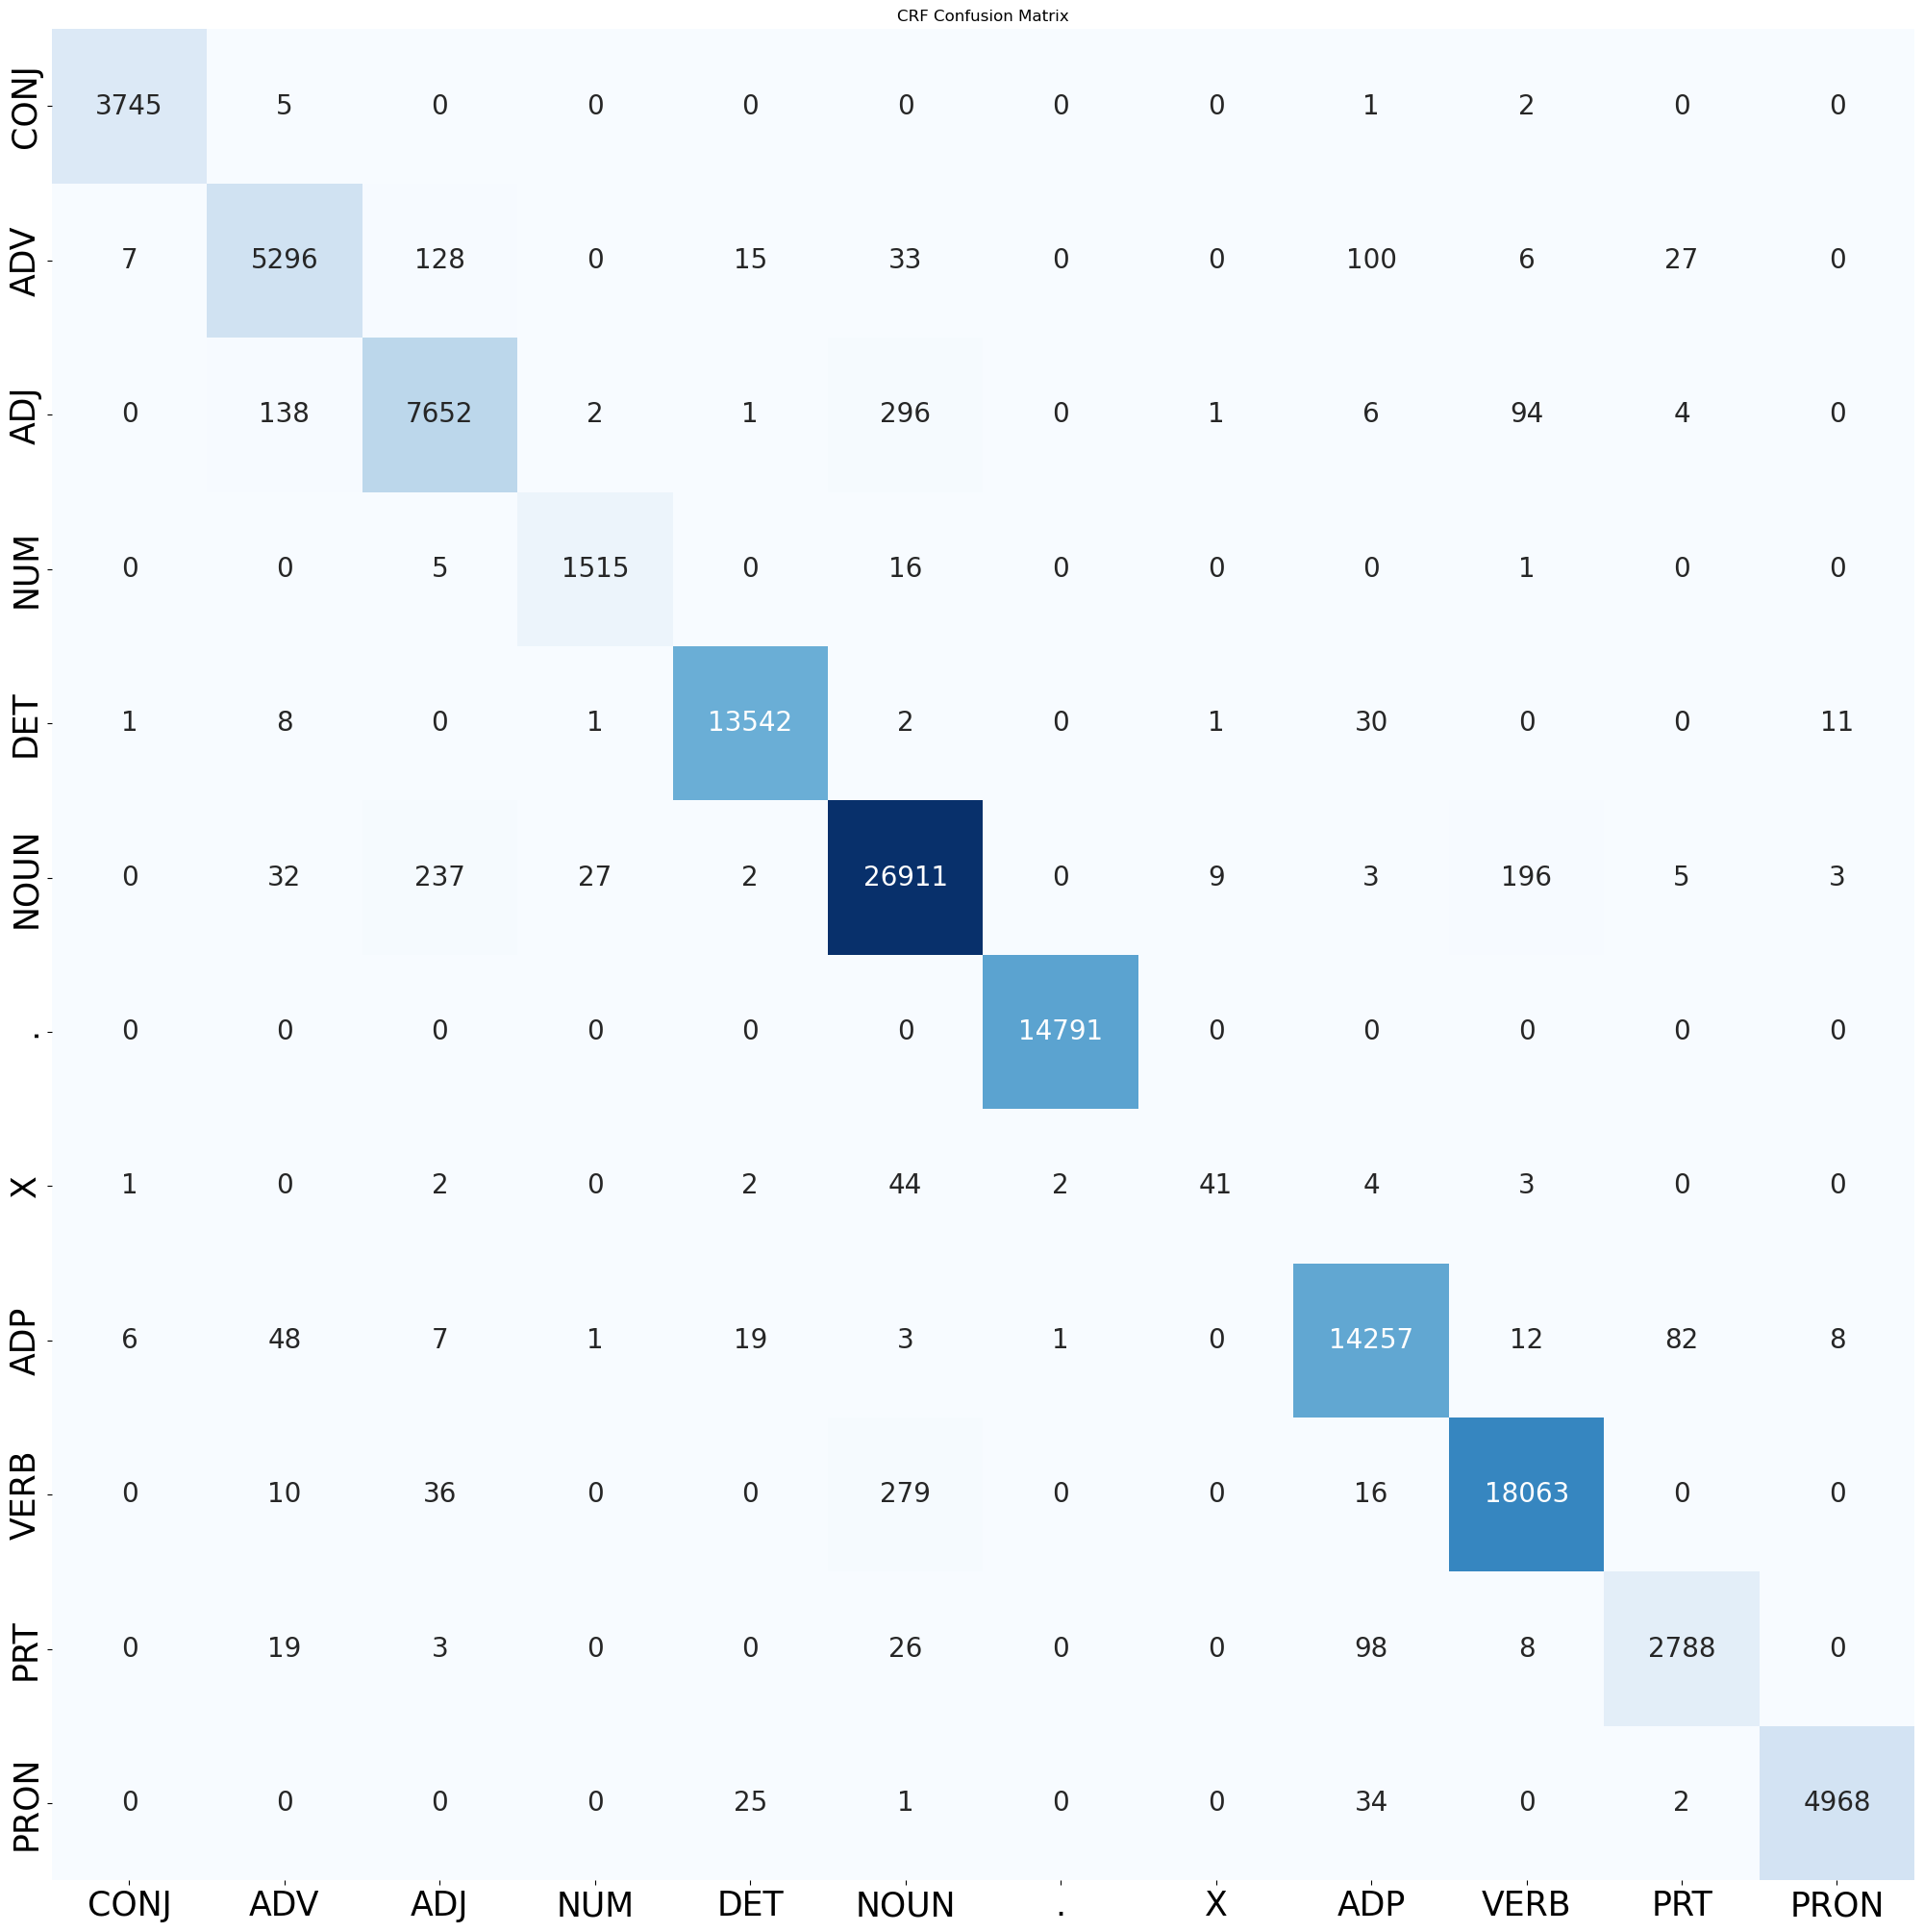

In [27]:
plt.figure(figsize=(25, 25))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False, annot_kws={"size": 20})
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_title("CRF Confusion Matrix")
plt.show()

In [29]:
incorrect_cases = {
    ('NOUN', 'ADJ'),
    ('VERB', 'ADJ'),
    ('ADJ', 'NOUN'),
    ('VERB', 'NOUN'),
    ('NOUN', 'VERB'),
    ('ADP', 'ADV'),
    ('DET', 'PRON'),
    ('ADJ', 'ADV'),
    ('PRT', 'ADP')
}

In [30]:
def find_wrong_predictions(pred_preds, true_preds, incorrect_cases, testX):
    wrong_predictions = {case: [] for case in incorrect_cases}
    for i, (true_seq, pred_seq) in enumerate(zip(true_preds, pred_preds)):
        for j, (true_tag, pred_tag) in enumerate(zip(true_seq, pred_seq)):
            if (true_tag, pred_tag) in incorrect_cases:
                wrong_predictions[(true_tag, pred_tag)].append({
                    'sentence_index': i,
                    'word_index': j,
                    'true_tag': true_tag,
                    'predicted_tag': pred_tag,
                    'word': testX[i][j],
                    'sentence': ' '.join(testX[i])
                })
    return wrong_predictions

def save_predictions_to_files(wrong_preds, output_dir='wrong_predictions'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for case, predictions in wrong_preds.items():
        case_str = f"{case[0]}_to_{case[1]}"
        file_path = os.path.join(output_dir, f"{case_str}.txt")
        with open(file_path, 'w') as f:
            for item in predictions:
                f.write(f"Sentence Index: {item['sentence_index']}, Word Index: {item['word_index']}, Word: '{item['word']}', True Tag: {item['true_tag']}, Predicted Tag: {item['predicted_tag']}\n")
                f.write(f"Sentence: {item['sentence']}\n")
                f.write("\n")
                              
def extract_words(testX):
    return [[word_dict['word'] for word_dict in sentence] for sentence in testX]

In [31]:
#make testX listoflist of words
testX_wordsOnly = extract_words(testX)

In [33]:
wrong_preds = find_wrong_predictions(test_predictions, testY, incorrect_cases, testX_wordsOnly)

# Save predictions to files
save_predictions_to_files(wrong_preds)